# Non-Dominated Sorting Genetic Algorithm

In [1]:
import numpy as np
from modules.plotter import print_result
from modules.golomb_problem import init_simple_problem, init_medium_problem, init_hard_problem

In [2]:
#UDP = init_simple_problem()
UDP = init_medium_problem()
#UDP = init_hard_problem()

MULTI OBIETTIVO

Evoluzione in corso...


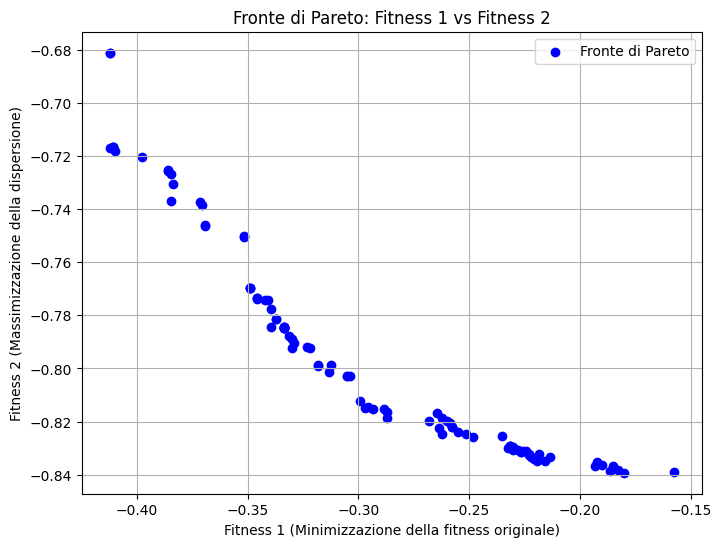


Migliore soluzione trovata:
X = [-0.83446873 -0.94784647 -0.83156291  0.15685178  0.37118634 -0.18952618
  0.92338041 -0.85601109 -0.83995747 -0.08121438 -0.21360482 -0.31865174
  0.92338483 -0.17822524 -0.84171072 -0.34765972  0.28521084  0.91541845
  0.95252174 -0.98514576  0.31957014  0.08756848  0.35660316 -0.73957495
  0.34919232  0.21459697  0.62330536  0.53749886 -0.99499422 -0.20425857
  0.11680031 -0.89777821  0.3701169  -0.24045209  0.23582205  0.10195873
  0.98062242  0.95824161  0.9814557   0.19752675 -0.75589443  0.60216806
 -0.98131546 -0.87716958 -0.26925313  0.15089133  0.72828653  0.11146813
 -0.98234305 -0.71156615  0.96848061  0.72155498 -0.44860794 -0.7564874
 -0.75178117  0.82648336 -0.75881826 -0.53851949  0.8317891  -0.46636383
  0.34617147  0.94438808 -0.78043665 -0.37725815 -0.12469971  0.56044451
  0.56002759  0.96543041  0.97158912 -0.13359652 -0.14478528 -0.54840785
  0.94209738 -0.97276021 -0.90615962 -0.15395606  0.06635872 -0.31931841
 -0.93426971 -0.984

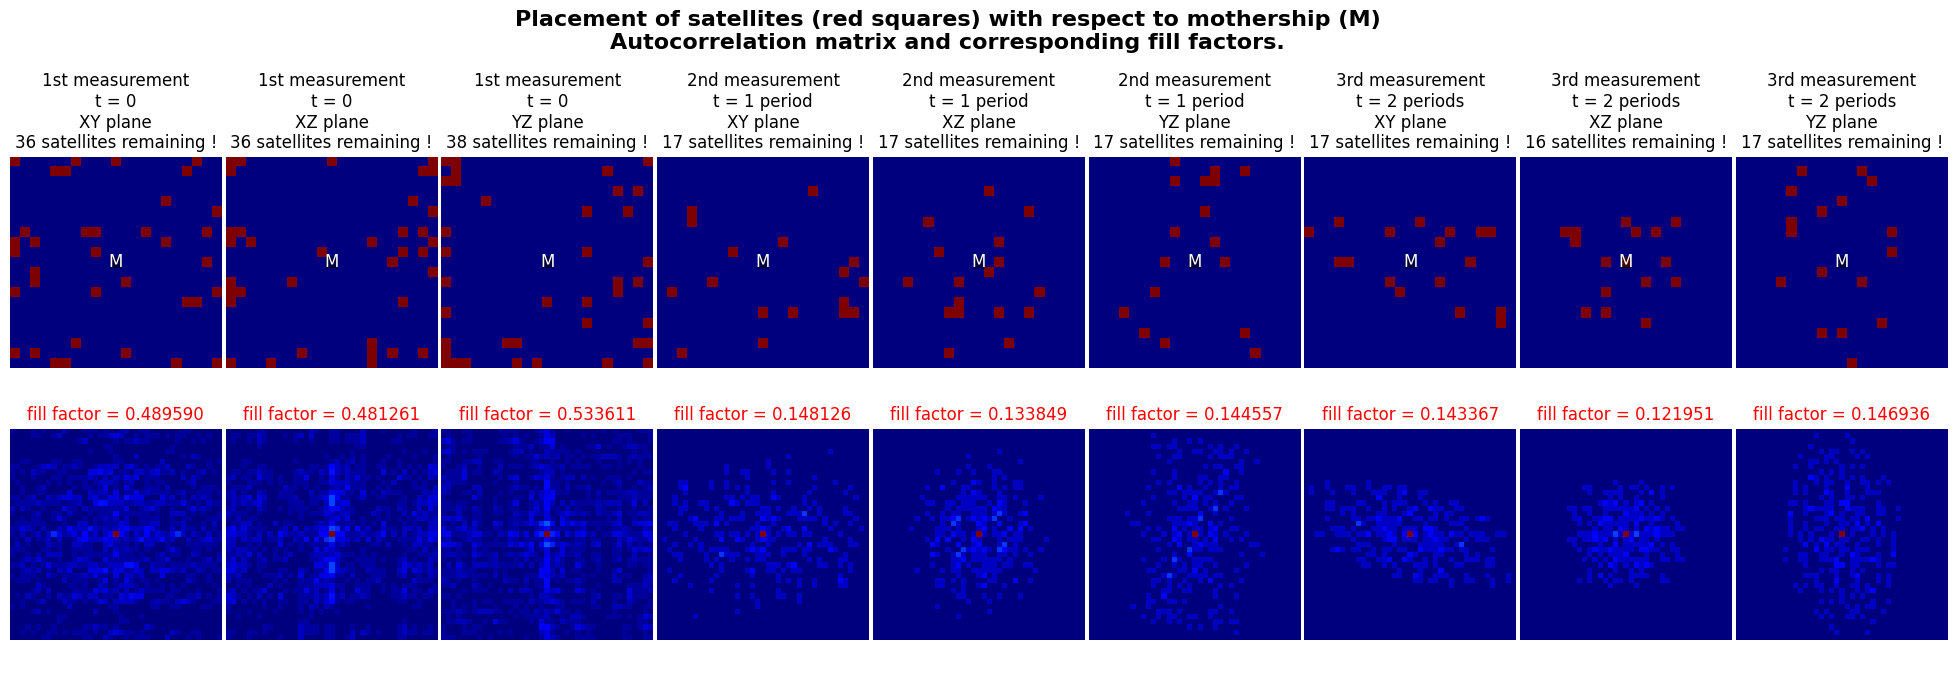

---

XY	SSIM = 76.3040%


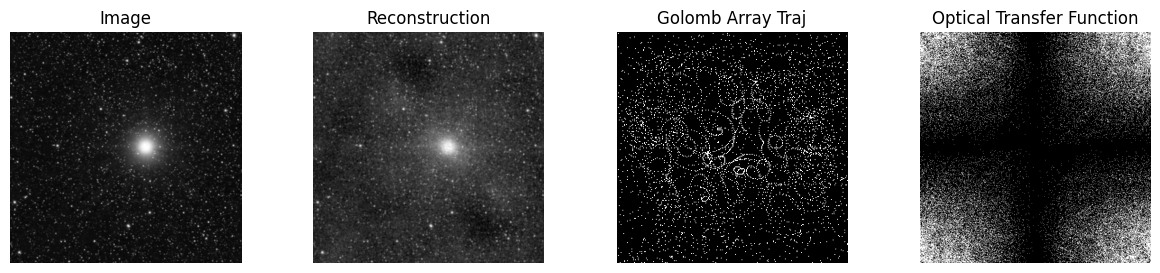

XZ	SSIM = 78.5603%


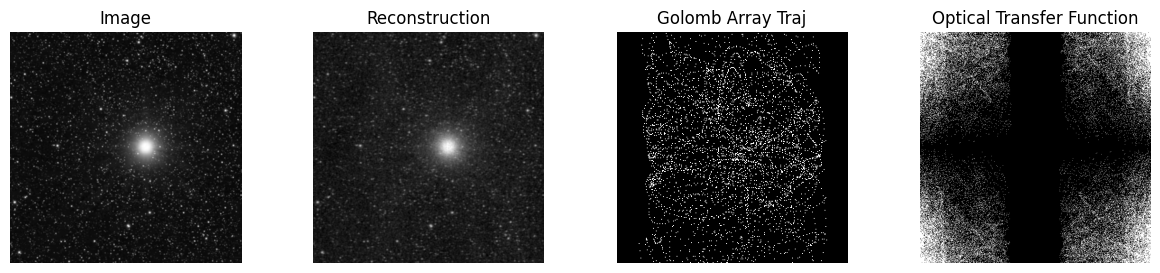

YZ	SSIM = 77.4168%


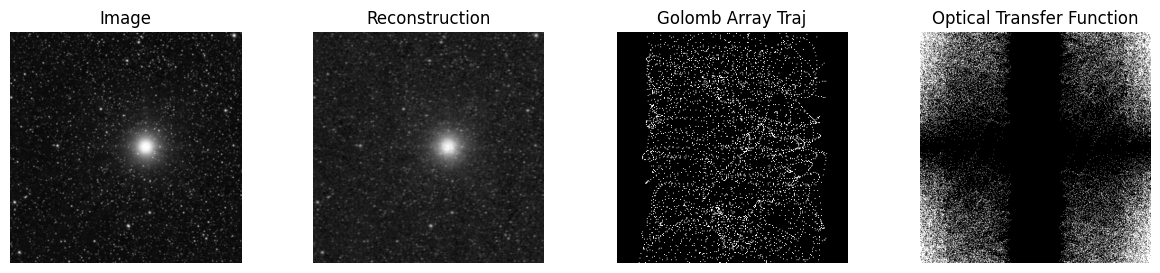

---

XY	SSIM = 81.1438%


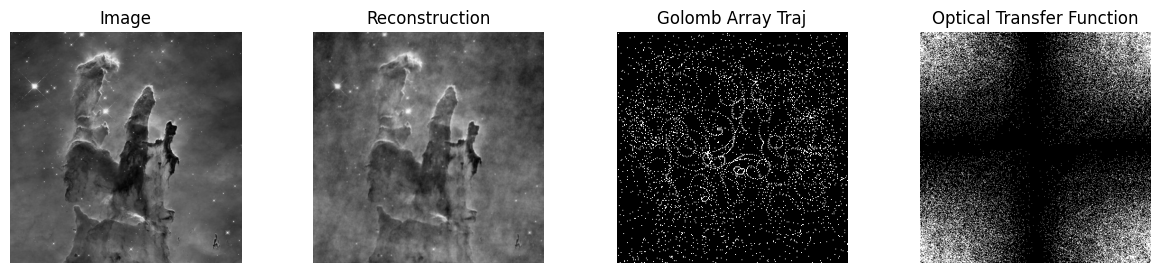

XZ	SSIM = 84.2884%


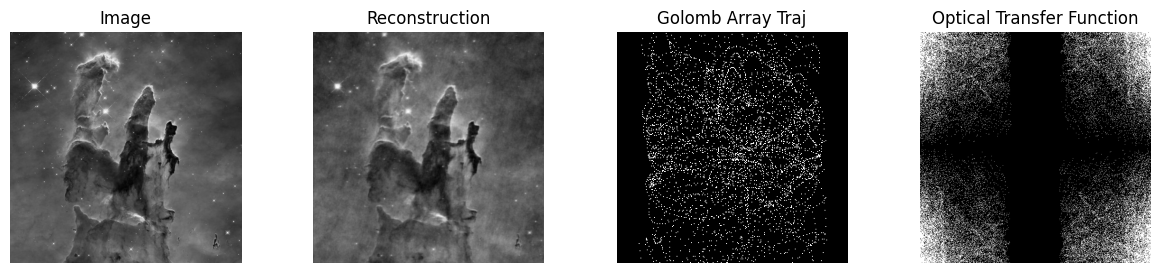

YZ	SSIM = 83.9802%


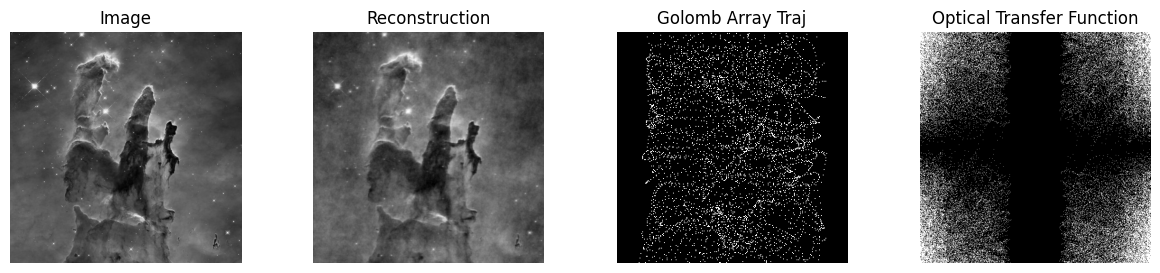

In [3]:
import pygmo as pg
import matplotlib.pyplot as plt

# Classe per il problema di ottimizzazione con NSGA-II
class GolombOptimization:
    def __init__(self, udp):
        """
        Costruttore del problema.
        udp: Problema esistente da ottimizzare.
        """
        self.udp = udp
        self.n_var = udp.n_sat * 6  # Numero di variabili: posizioni e velocità
        self.n_obj = 2  # Multi-obiettivo
        self.bounds = ([-1] * self.n_var, [1] * self.n_var)  # Limiti variabili

    def fitness(self, x):
        """
        Calcola la fitness:
        - Obiettivo 1: Minimizzazione della fitness originale (problema UDP)
        - Obiettivo 2: Massimizzazione della dispersione (varianza negativa delle posizioni)
        """
        f1 = self.udp.fitness(x)[0]  # Fitness originale
        positions = np.array(x).reshape(-1, 6)[:, :3]  # Posizioni XYZ
        f2 = -np.var(positions)  # Varianza negativa delle posizioni
        
        return [f1, f2]

    def get_bounds(self):
        return self.bounds

    def get_nobj(self):
        return self.n_obj

def run_and_display_nsga2(udp, n_generations=100, population_size=100):
    """
    Configura, esegue l'algoritmo NSGA-II e visualizza i risultati.
    """
    # Configura il problema
    problem = pg.problem(GolombOptimization(udp))

    # Configura l'algoritmo NSGA-II
    algorithm = pg.algorithm(pg.nsga2(gen=n_generations))

    # Inizializza la popolazione
    population = pg.population(problem, size=population_size)

    # Esegui l'ottimizzazione
    print("Evoluzione in corso...")
    population = algorithm.evolve(population)

    # Ottieni i risultati
    pareto_fitness = population.get_f()
    pareto_vectors = population.get_x()

    # Visualizza il fronte di Pareto
    plot_pareto_front(pareto_fitness)

    # Seleziona la migliore soluzione (in base al primo obiettivo)
    best_solution_idx = np.argmin(pareto_fitness[:, 0])
    best_solution = pareto_vectors[best_solution_idx]
    best_fitness = pareto_fitness[best_solution_idx]

    print("\nMigliore soluzione trovata:")
    print(f"X = {best_solution}")
    print(f"Fitness 1 = {best_fitness[0]:.4f}")
    print(f"Fitness 2 = {best_fitness[1]:.4f}")

    # Visualizza i risultati con print_result
    print_result(udp, best_solution, 300,show_simulated_reconstruction=True)

def plot_pareto_front(pareto_fitness):
    """
    Visualizza il fronte di Pareto.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(pareto_fitness[:, 0], pareto_fitness[:, 1], color='blue', label='Fronte di Pareto')
    plt.title("Fronte di Pareto: Fitness 1 vs Fitness 2")
    plt.xlabel("Fitness 1 (Minimizzazione della fitness originale)")
    plt.ylabel("Fitness 2 (Massimizzazione della dispersione)")
    plt.grid()
    plt.legend()
    plt.show()

# Esegui il codice principale
if __name__ == "__main__":
    run_and_display_nsga2(UDP, n_generations=300, population_size=100)


Evoluzione in corso...


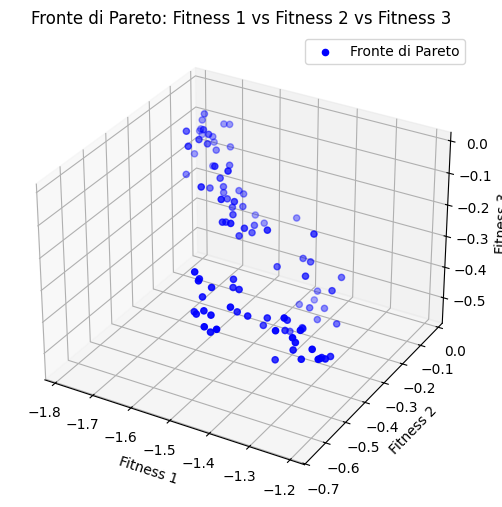


Soluzione più vicina alla soluzione ideale:
X = [ 0.31746985 -0.19753521 -0.22583448 -0.04561903  0.59639928  0.28312296
  0.12877451  0.25566031  0.59475177 -0.05187854 -0.47520314  0.98029731
  0.69798427  0.45272777  0.77053562 -0.91684649 -0.36637984  0.1029489
  0.12508537 -0.04791058  0.22852961 -0.70524746 -0.40358429 -0.04430455
  0.14421362 -0.86266065 -0.0820567  -0.12740902 -0.30918689  0.23762917
  0.24033766  0.02862981  0.04333057 -0.02653756  0.20421385 -0.92509799
 -0.29434853  0.13574349 -0.7655487  -0.33764528 -0.61068988  0.95331421
 -0.76295432 -0.32851258 -0.9750794   0.47476126 -0.36122204  0.8616074
 -0.91876782  0.4232388  -0.09777675  0.31520079 -0.80152382  0.83672459
  0.99627408 -0.15441824 -0.90825727 -0.26531051  0.35030314  0.6331533
 -0.16978951 -0.82859691 -0.42504436 -0.31412256 -0.34390202 -0.82948179
  0.4619621  -0.71484246  0.6187895   0.31900601 -0.39684874 -0.82487568
 -0.87041063  0.97262087  0.31357225 -0.20322301 -0.35415915 -0.9652996
  0.55

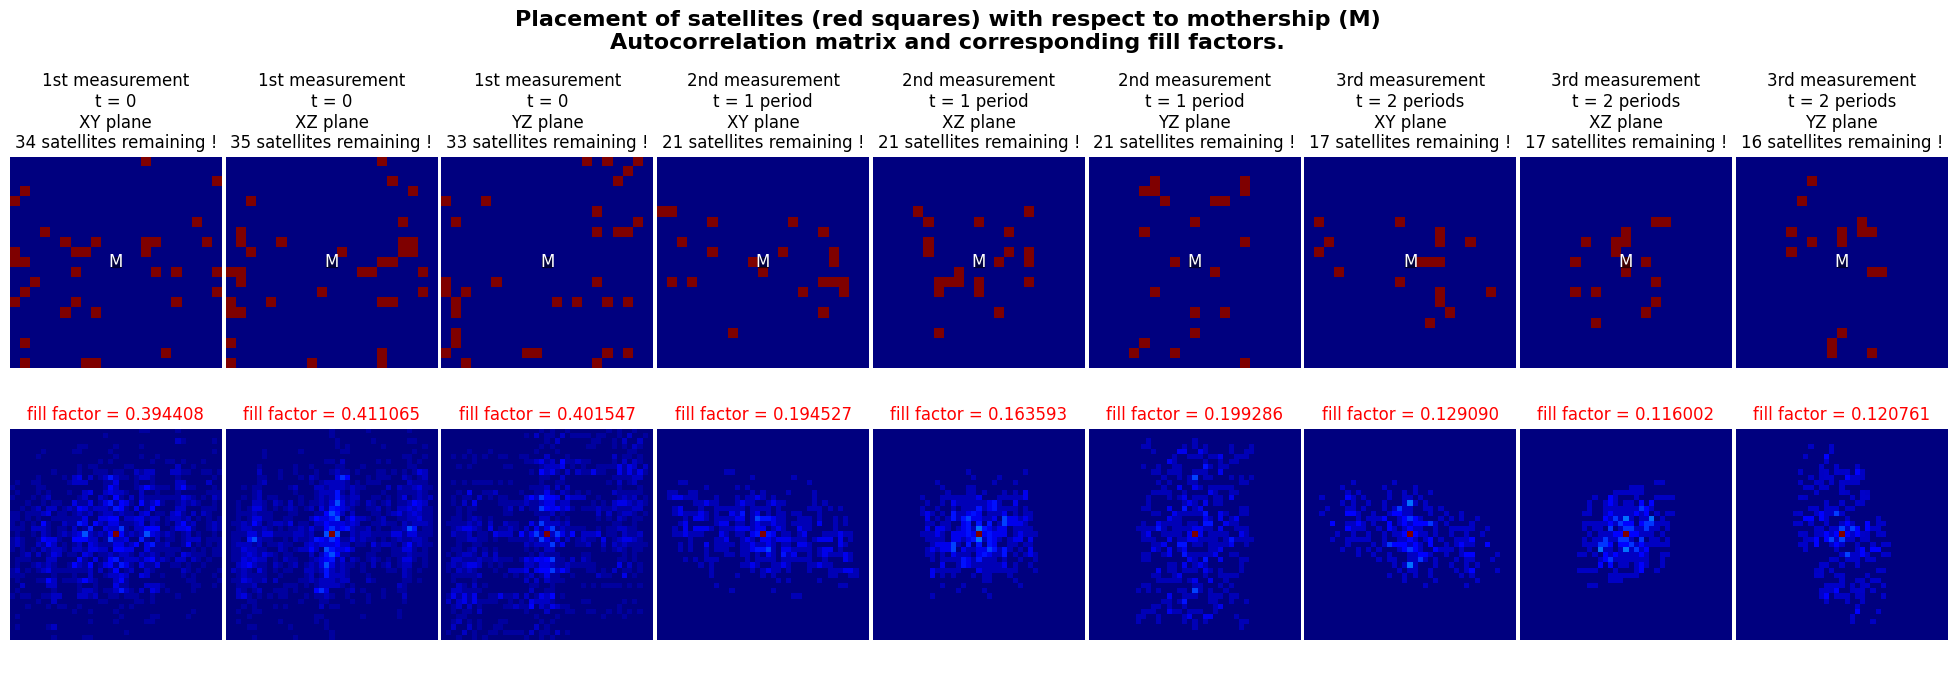

---

XY	SSIM = 82.3380%


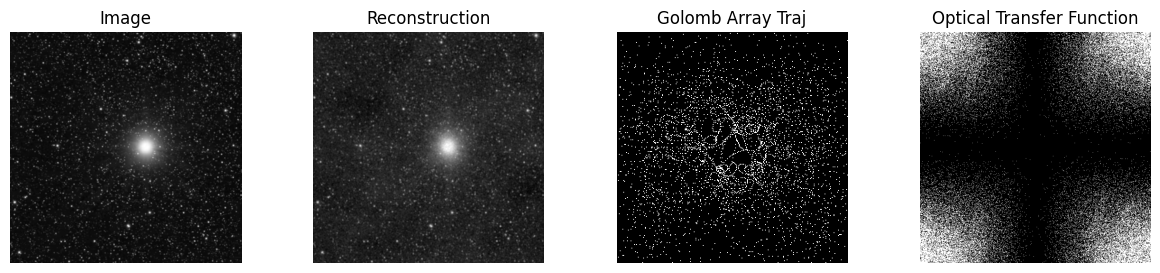

XZ	SSIM = 82.0654%


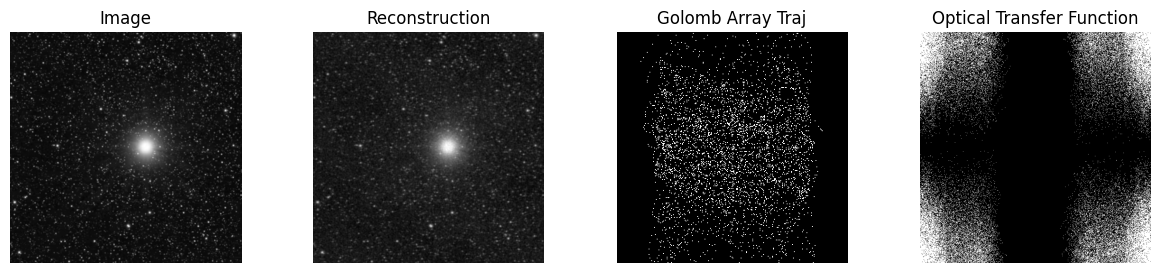

YZ	SSIM = 80.8859%


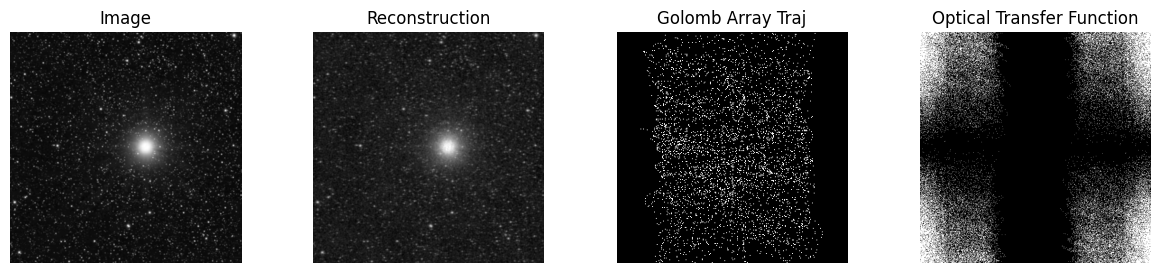

---

XY	SSIM = 85.3913%


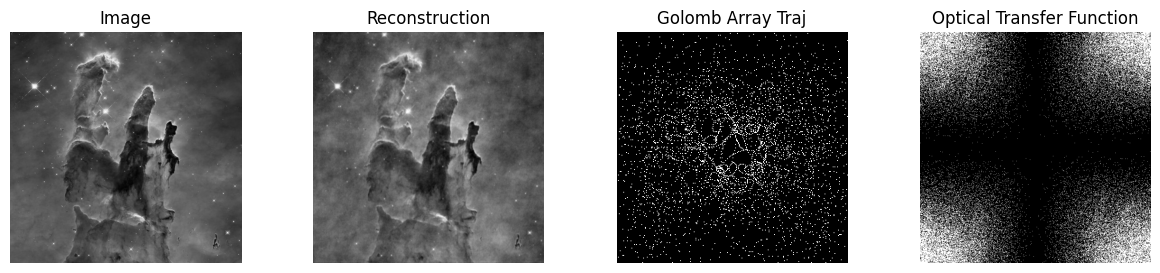

XZ	SSIM = 87.3016%


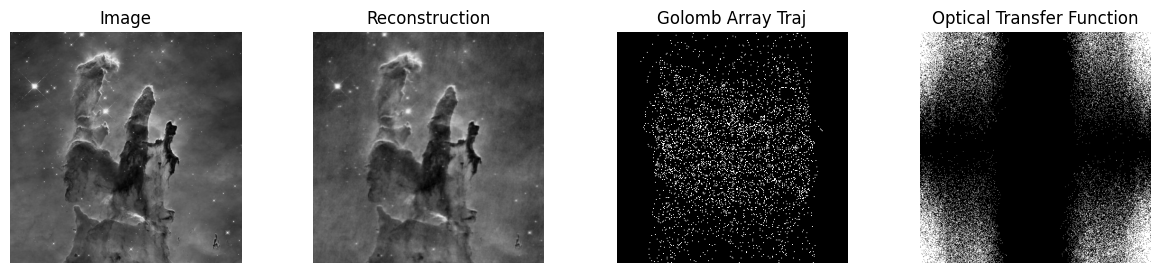

YZ	SSIM = 86.2645%


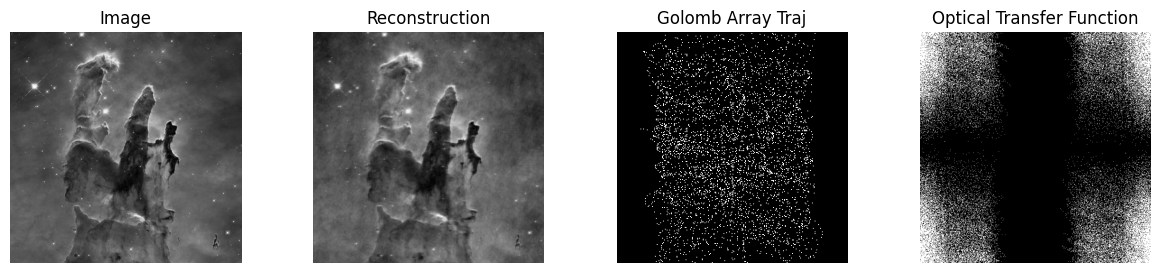

In [4]:
# Classe per il problema di ottimizzazione con NSGA-II

class GolombOptimization:
    def __init__(self, udp):
        """
        Costruttore del problema.
        udp: Problema esistente da ottimizzare.
        """
        self.udp = udp
        self.n_var = udp.n_sat * 6  # Numero di variabili: posizioni e velocità
        self.n_obj = 4  # Multi-obiettivo
        self.bounds = ([-1] * self.n_var, [1] * self.n_var)  # Limiti variabili

    def fitness(self, x):
        """
        Calcola le fitness:
        - f1, f2, f3: Fattori di riempimento ai tre istanti temporali.
        - f4: Distanza media negativa tra i satelliti.
        """
        # Calcola le fitness ai 3 singoli istanti temporali
        fill_factors = self.udp.fitness_impl(x, plotting=False, return_all_n_meas_fillfactor=True)
        if len(fill_factors) < 3:
            raise ValueError("La funzione fitness_impl non ha restituito almeno 3 valori.")
        f1 = fill_factors[0]  # Fitness al primo istante
        f2 = fill_factors[1]  # Fitness al secondo istante
        f3 = fill_factors[2]  # Fitness al terzo istante

        # Calcola la distanza media tra i satelliti
        positions = np.array(x).reshape(-1, 6)[:, :3]  # Estrae solo le posizioni (x, y, z)
        distances = []
        for i in range(len(positions)):
            for j in range(i + 1, len(positions)):
                dist = np.linalg.norm(positions[i] - positions[j])
                distances.append(dist)
        f4 = -np.mean(distances)  # Distanza media negativa (minimizziamo la dispersione)

        return [f1, f2, f3, f4]  # Restituisce le 4 fitness

    def get_bounds(self):
        return self.bounds

    def get_nobj(self):
        return self.n_obj


def plot_pareto_front(pareto_fitness):
    """
    Visualizza il fronte di Pareto in 3D per i primi 3 obiettivi.
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(
        pareto_fitness[:, 0], pareto_fitness[:, 1], pareto_fitness[:, 2],
        c='blue', marker='o', label="Fronte di Pareto"
    )

    ax.set_title("Fronte di Pareto: Fitness 1 vs Fitness 2 vs Fitness 3")
    ax.set_xlabel("Fitness 1")
    ax.set_ylabel("Fitness 2")
    ax.set_zlabel("Fitness 3")
    plt.legend()
    plt.show()


def get_best_solution(pareto_fitness, pareto_vectors):
    """
    Restituisce la soluzione più vicina alla soluzione ideale.
    """
    ideal_solution = np.array([0, 0, 0, 0])  # Soluzione ideale con tutti gli obiettivi ottimali
    distances = np.linalg.norm(pareto_fitness - ideal_solution, axis=1)
    best_idx = np.argmin(distances)
    return pareto_vectors[best_idx], pareto_fitness[best_idx]


def run_and_display_nsga2(udp, n_generations=300, population_size=100):
    """
    Configura, esegue l'algoritmo NSGA-II e visualizza i risultati.
    """
    # Configura il problema
    problem = pg.problem(GolombOptimization(udp))

    # Configura l'algoritmo NSGA-II
    algorithm = pg.algorithm(pg.nsga2(gen=n_generations))

    # Inizializza la popolazione
    population = pg.population(problem, size=population_size)

    # Esegui l'ottimizzazione
    print("Evoluzione in corso...")
    population = algorithm.evolve(population)

    # Ottieni i risultati
    pareto_fitness = population.get_f()
    pareto_vectors = population.get_x()

    # Visualizza il fronte di Pareto
    plot_pareto_front(pareto_fitness)

    # Trova la soluzione più vicina alla soluzione ideale
    best_solution, best_fitness = get_best_solution(pareto_fitness, pareto_vectors)

    # Stampa la soluzione migliore
    print("\nSoluzione più vicina alla soluzione ideale:")
    print(f"X = {best_solution}")
    print(f"Fitness 1 = {best_fitness[0]:.4f}")
    print(f"Fitness 2 = {best_fitness[1]:.4f}")
    print(f"Fitness 3 = {best_fitness[2]:.4f}")
    print(f"Fitness 4 = {best_fitness[3]:.4f}")

    # Visualizza i risultati con print_result
    print_result(udp, best_solution, 200, show_simulated_reconstruction=True)


# Esegui il codice principale
if __name__ == "__main__":
    run_and_display_nsga2(UDP, n_generations=300, population_size=100)


Evoluzione in corso...


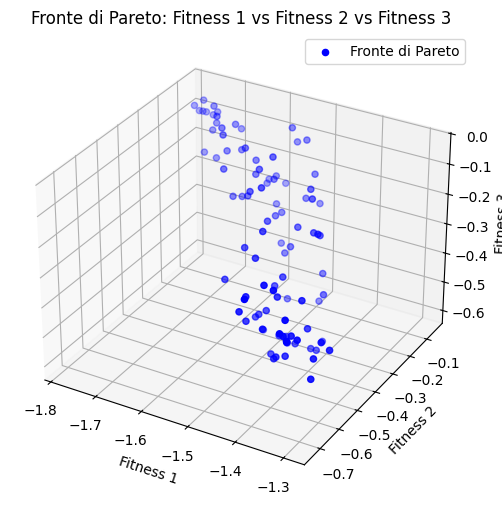


Soluzione più vicina alla soluzione ideale:
X = [-0.17762931  0.07742109 -0.45618394 -0.56950463  0.53402088 -0.11378078
  0.18992052 -0.16666063 -0.19626158 -0.27487456  0.05978743 -0.11366559
  0.8315952  -0.26656944  0.65368648 -0.02153965 -0.27829461 -0.66868064
 -0.34084624 -0.19878811  0.04968006  0.02127929  0.64397167 -0.05604916
 -0.31682929  0.0466951   0.93631673  0.2769156   0.74474395 -0.53516472
 -0.33352323 -0.92567496 -0.10259555  0.49191618 -0.99590892 -0.01740945
 -0.08976967  0.69197648 -0.26186106 -0.8324999  -0.69799888  0.41996103
  0.73347816 -0.74306084 -0.83713146 -0.93616186  0.12706811 -0.16057531
 -0.95234565 -0.94975652 -0.6190911  -0.03250449 -0.45325788 -0.04931277
  0.48097693 -0.31345478  0.84705548  0.43658851  0.32148554  0.62464069
 -0.92986707  0.02844062  0.9765259  -0.60539004  0.80677897  0.33191677
  0.5426454   0.90467308 -0.13182085 -0.49616262  0.25668032 -0.53046091
  0.01669072  0.22501825  0.15703772 -0.55661087  0.43273475 -0.5018308
  0

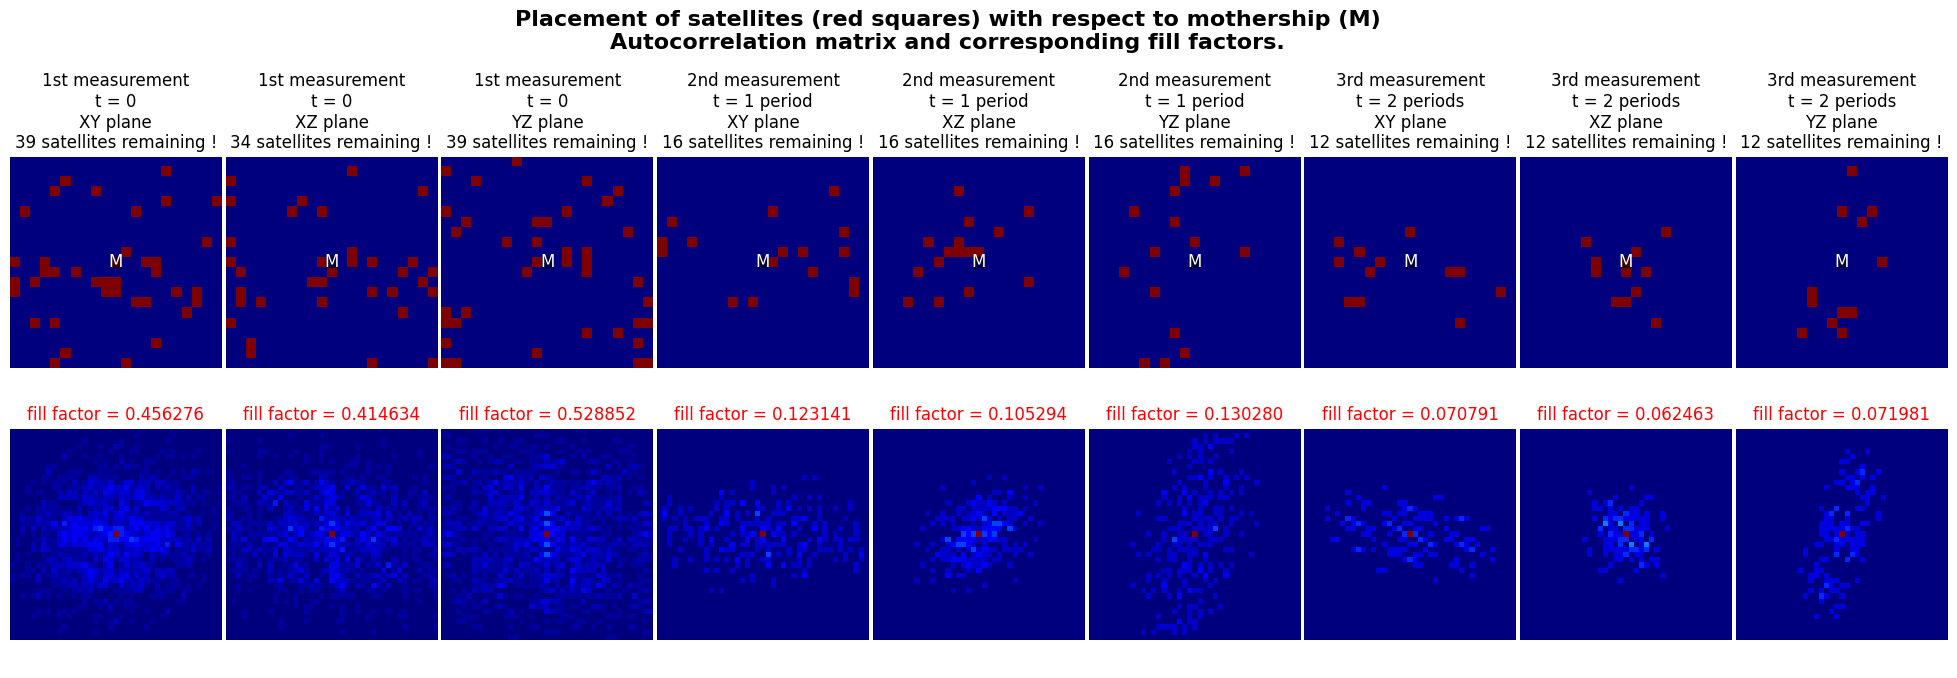

---

XY	SSIM = 77.8871%


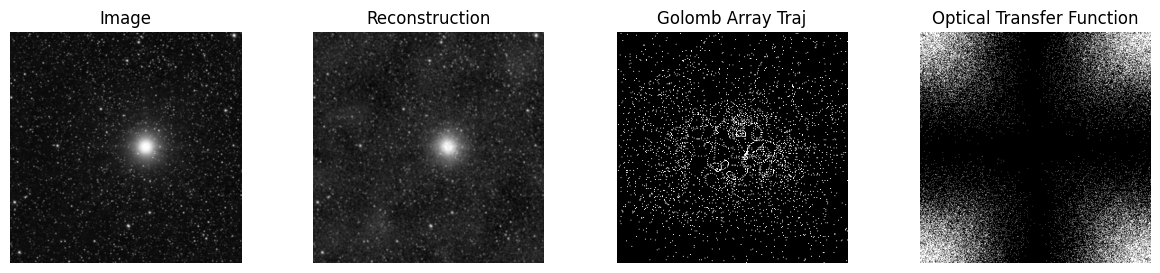

XZ	SSIM = 79.8710%


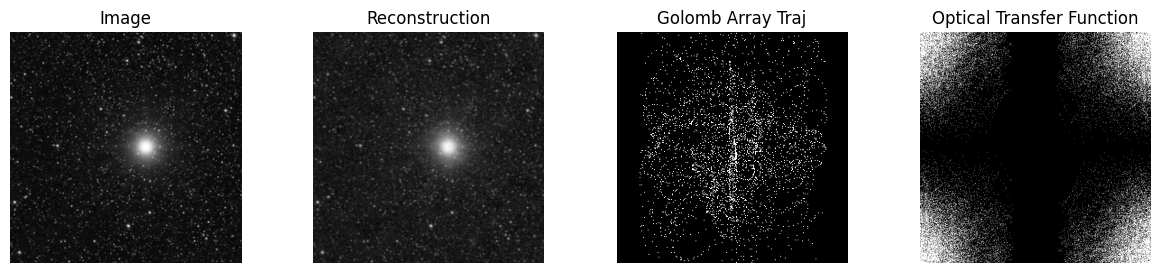

YZ	SSIM = 78.3530%


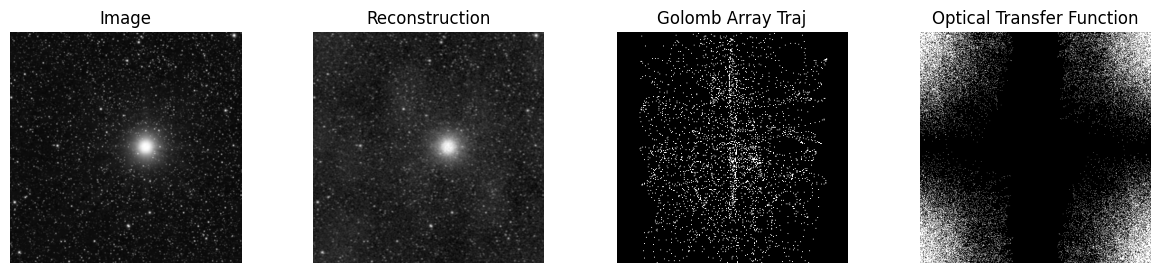

---

XY	SSIM = 83.6864%


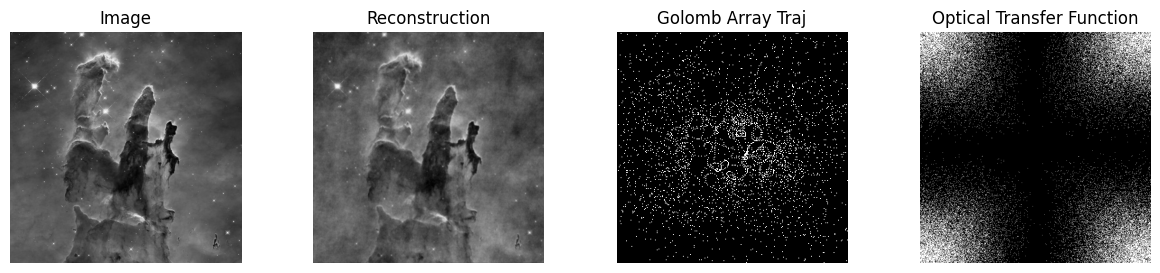

XZ	SSIM = 85.4831%


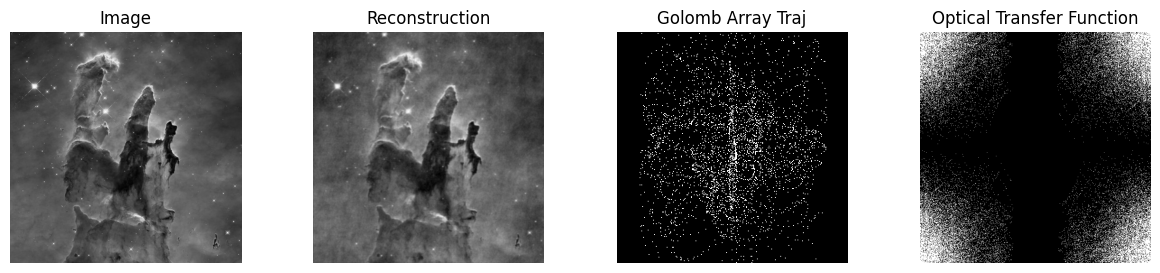

YZ	SSIM = 84.2456%


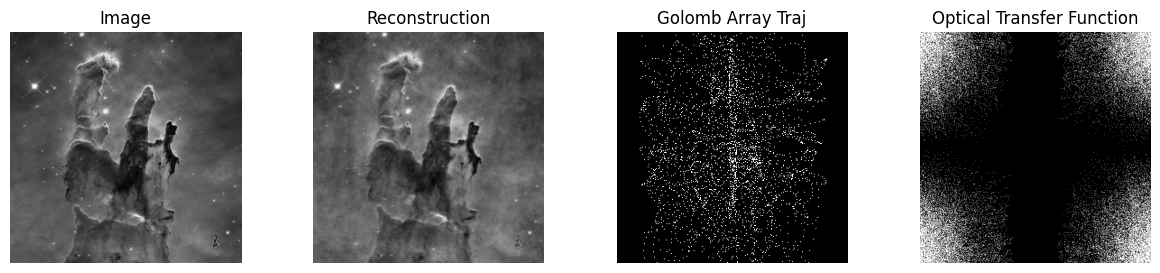

In [7]:
# Classe per il problema di ottimizzazione con NSGA-II

from modules.golomb_problem import compute_unique_distances_and_sats_in_grid


class GolombOptimization:
    def __init__(self, udp):
        """
        Costruttore del problema.
        udp: Problema esistente da ottimizzare.
        """
        self.udp = udp
        self.n_var = udp.n_sat * 6  # Numero di variabili: posizioni e velocità
        self.n_obj = 4  # Multi-obiettivo
        self.bounds = ([-1] * self.n_var, [1] * self.n_var)  # Limiti variabili
        
    def fitness(self, x):
     """
    Calcola le fitness:
    - f1, f2, f3: Fattori di riempimento ai tre istanti temporali.
    - f4: Numero normalizzato di distanze uniche tra i satelliti.
    """
    # Calcola le fitness ai 3 singoli istanti temporali
     fill_factors = self.udp.fitness_impl(x, plotting=False, return_all_n_meas_fillfactor=True)
     if len(fill_factors) < 3:
        raise ValueError("La funzione fitness_impl non ha restituito almeno 3 valori.")
     f1 = fill_factors[0]  # Fitness al primo istante
     f2 = fill_factors[1]  # Fitness al secondo istante
     f3 = fill_factors[2]  # Fitness al terzo istante

    # Calcola f4: Numero normalizzato di distanze uniche
     distances_score, _ = compute_unique_distances_and_sats_in_grid(self.udp, x)
     f4 = -distances_score  # Minimizzazione del punteggio delle distanze uniche

     return [f1, f2, f3, f4]  # Restituisce le 4 fitness


    def get_bounds(self):
        return self.bounds

    def get_nobj(self):
        return self.n_obj


def plot_pareto_front(pareto_fitness):
    """
    Visualizza il fronte di Pareto in 3D per i primi 3 obiettivi.
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(
        pareto_fitness[:, 0], pareto_fitness[:, 1], pareto_fitness[:, 2],
        c='blue', marker='o', label="Fronte di Pareto"
    )

    ax.set_title("Fronte di Pareto: Fitness 1 vs Fitness 2 vs Fitness 3")
    ax.set_xlabel("Fitness 1")
    ax.set_ylabel("Fitness 2")
    ax.set_zlabel("Fitness 3")
    plt.legend()
    plt.show()


def get_best_solution(pareto_fitness, pareto_vectors):
    """
    Restituisce la soluzione più vicina alla soluzione ideale.
    """
    ideal_solution = np.array([0, 0, 0, 0])  # Soluzione ideale con tutti gli obiettivi ottimali
    distances = np.linalg.norm(pareto_fitness - ideal_solution, axis=1)
    best_idx = np.argmin(distances)
    return pareto_vectors[best_idx], pareto_fitness[best_idx]


def run_and_display_nsga2(udp, n_generations=300, population_size=100):
    """
    Configura, esegue l'algoritmo NSGA-II e visualizza i risultati.
    """
    # Configura il problema
    problem = pg.problem(GolombOptimization(udp))

    # Configura l'algoritmo NSGA-II
    algorithm = pg.algorithm(pg.nsga2(gen=n_generations))

    # Inizializza la popolazione
    population = pg.population(problem, size=population_size)

    # Esegui l'ottimizzazione
    print("Evoluzione in corso...")
    population = algorithm.evolve(population)

    # Ottieni i risultati
    pareto_fitness = population.get_f()
    pareto_vectors = population.get_x()

    # Visualizza il fronte di Pareto
    plot_pareto_front(pareto_fitness)

    # Trova la soluzione più vicina alla soluzione ideale
    best_solution, best_fitness = get_best_solution(pareto_fitness, pareto_vectors)

    # Stampa la soluzione migliore
    print("\nSoluzione più vicina alla soluzione ideale:")
    print(f"X = {best_solution}")
    print(f"Fitness 1 = {best_fitness[0]:.4f}")
    print(f"Fitness 2 = {best_fitness[1]:.4f}")
    print(f"Fitness 3 = {best_fitness[2]:.4f}")
    print(f"Fitness 4 = {best_fitness[3]:.4f}")

    # Visualizza i risultati con print_result
    print_result(udp, best_solution, 200, show_simulated_reconstruction=True)


# Esegui il codice principale
if __name__ == "__main__":
    run_and_display_nsga2(UDP, n_generations=300, population_size=100)
